### Procesamiento digital de imágenes con **Python**

#### Filtrado en el dominio de Frecuencia utilizando la Transformada de Fourier

In [16]:
import numpy as np
from skimage import io, color, exposure, data, img_as_float, filters
from matplotlib import pyplot as plt
import matplotlib as mpl
from IPython.display import Image
mpl.rcParams["figure.figsize"] = [18, 10]

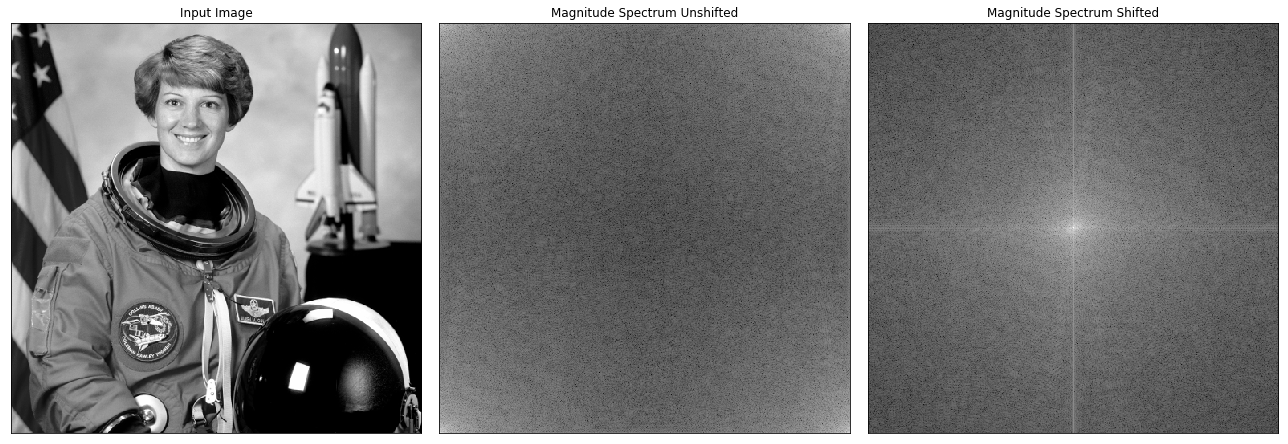

In [19]:
astronaut = color.rgb2gray(data.astronaut())

f = np.fft.fft2(astronaut) #Obtenemos la transformada de la img
fshift = np.fft.fftshift(f) #Reacomoda los pixels
phase = np.imag(fshift) #Separamos la parte real de la imaginaria
magnitude_spectrum = np.log(np.abs(fshift))

plt.rcParams["figure.figsize"] = [18,10]
plt.subplot(131), plt.imshow(astronaut, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(np.log(np.abs(f)), cmap = 'gray')
plt.title('Magnitude Spectrum Unshifted'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum Shifted'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

#### ¿Por qué se simplifica la fórmula para obtener magnitude? https://goo.gl/AGhYCh

La formula original es 

`magnitude = sqrt( tf.real^2 + tf.imag^2 )` 

sin embargo los ejemplos muestran:

`magnitude = log(abs( tf_shifted ))`

Según: https://goo.gl/JF8ihe. La utilización de log ayuda a destacar aquellos detalles de la transformada en las que la funcion arroja valores muy cercanos a 0 mientras que aplicar la función abs, ayuda a hacer visibles los valores negativos que podrían ser información importante.

In [20]:
magnitude_spectrum_2 = np.abs(magnitude_spectrum) / np.max(magnitude_spectrum)
io.imsave('images/magnitude-astronaut.bmp', magnitude_spectrum_2, cmap=plt.cm.binary_r)

/usr/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [21]:
magnitude_high_pass = io.imread('images/magnitude-astronaut-hp.bmp', as_grey=True)
magnitude_low_pass  = io.imread('images/magnitude-astronaut-lp.bmp', as_grey=True)

(512, 512) (512, 512)


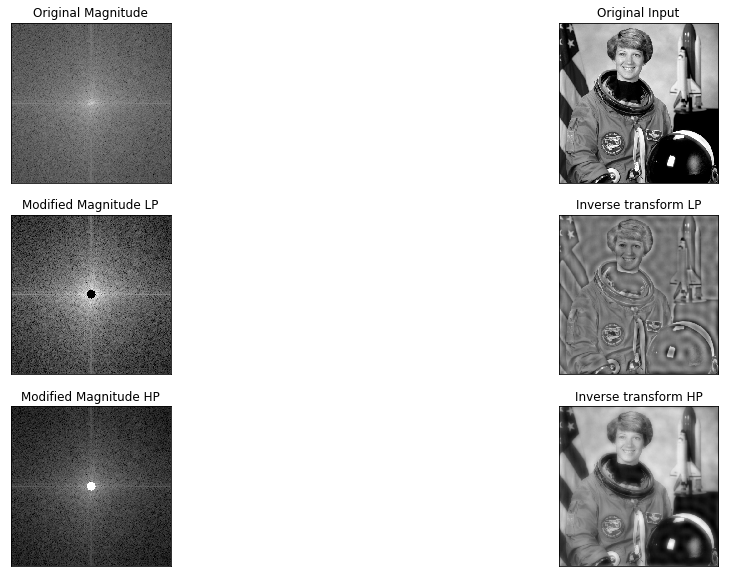

In [22]:
print(fshift.shape, magnitude_low_pass.shape)

f_ishift_lp = np.fft.ifftshift(fshift * magnitude_low_pass)
inv_lp = np.fft.ifft2(f_ishift_lp)
magnitude_result_lp = inv_lp.real

f_ishift_hp = np.fft.ifftshift(fshift * magnitude_high_pass)
inv_hp = np.fft.ifft2(f_ishift_hp)
magnitude_result_hp = inv_hp.real

titles = ['Original Magnitude',
          'Original Input',
          'Modified Magnitude LP', 
          'Inverse transform LP', 
          'Modified Magnitude HP',
          'Inverse transform HP',]

values = [magnitude_spectrum,
          astronaut,
          magnitude_low_pass, 
          magnitude_result_lp/magnitude_result_lp.max(), 
          magnitude_high_pass,
          magnitude_result_hp/magnitude_result_hp.max()]

for i, t in enumerate(titles):
    plt.subplot(3, 2, i+1)
    plt.title(titles[i])
    plt.imshow(values[i], cmap=plt.cm.binary_r)
    plt.xticks([])
    plt.yticks([])

#### Reducción de ruido con la Transformada de Fourier

In [6]:
img = io.imread("images/s1.png", as_grey=True)

/usr/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


(<matplotlib.axes._subplots.AxesSubplot at 0x7f59c0e97550>,
 <matplotlib.image.AxesImage at 0x7f59c1671b00>)

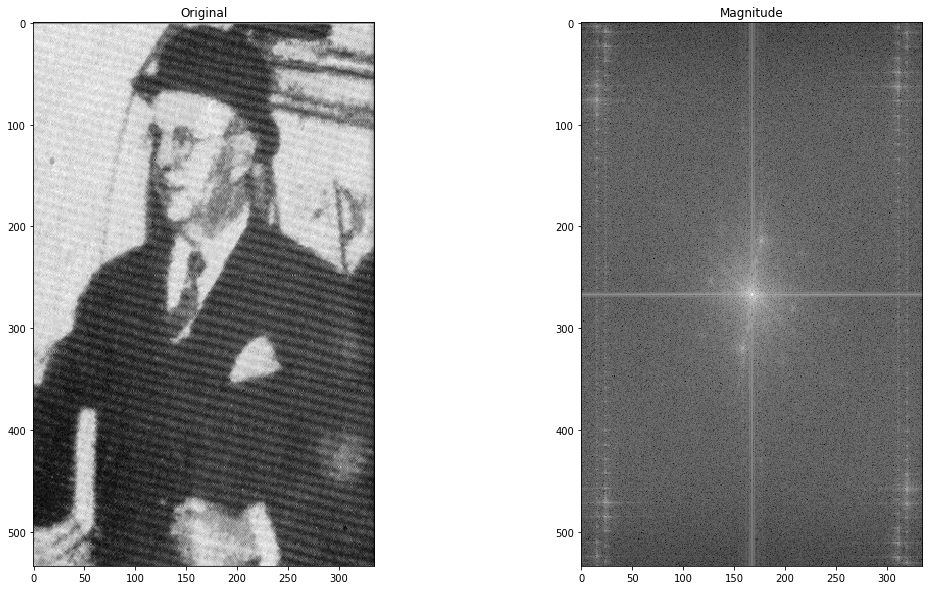

In [18]:
tf = np.fft.fft2(img)
tf_shift = np.fft.fftshift(tf)
magnitude = np.log(np.abs(tf_shift))

io.imsave("images/magnitude-s1.png", magnitude/magnitude.max())

plt.subplot(121), plt.title("Original"), plt.imshow(img, cmap=plt.cm.binary_r)
plt.subplot(122), plt.title("Magnitude"), plt.imshow(magnitude/magnitude.max(), cmap=plt.cm.binary_r)

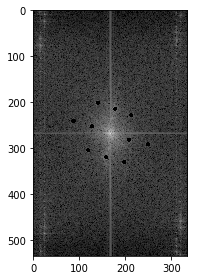

In [8]:
magnitude_mod = io.imread("images/magnitude-s1-mod.png", as_grey=True)
io.imshow(magnitude_mod)

In [9]:
tf_ishift = np.fft.ifftshift(tf_shift * magnitude_mod)
inv = np.fft.ifft2(tf_ishift)
result = inv.real

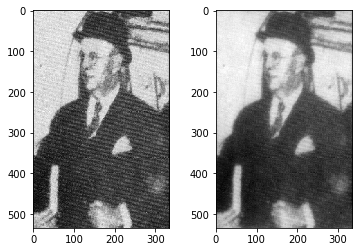

In [10]:
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.binary_r)
plt.subplot(122)
plt.imshow(result, cmap=plt.cm.binary_r)

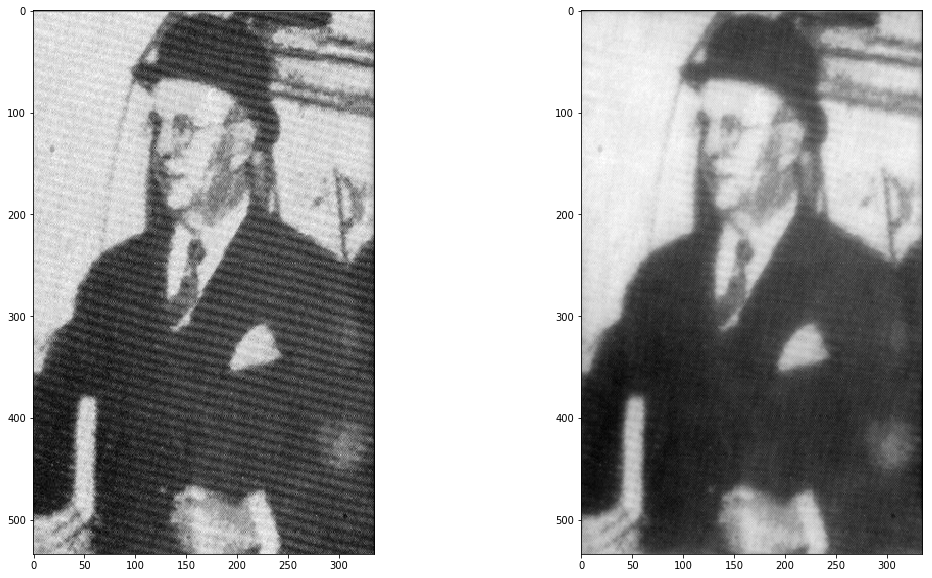

In [19]:
magnitude_mod_2 = io.imread("images/magnitude-s1-mod-2.png", as_grey=True)
tf_ishift_2 = np.fft.ifftshift(tf_shift * magnitude_mod_2)
inv_2 = np.fft.ifft2(tf_ishift_2)
result_2 = inv_2.real
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.binary_r)
plt.subplot(122)
plt.imshow(result_2, cmap=plt.cm.binary_r)

### Más ejemplos con [pseudocódigo](https://www.cs.unm.edu/~brayer/vision/fourier.html)

Puede usarse la TF con **imágenes color**? -> En teoría **es posible**, pero cada banda (RGB) debería ser procesada por separado y luego combinarse.
Más info: https://goo.gl/qNLDXS

#### Filtrado en el dominio del Espacio

In [20]:
f1_rgb = io.imread("images/f1_redbull.jpg")
f1_gray = io.imread("images/f1_redbull.jpg", as_grey=True)

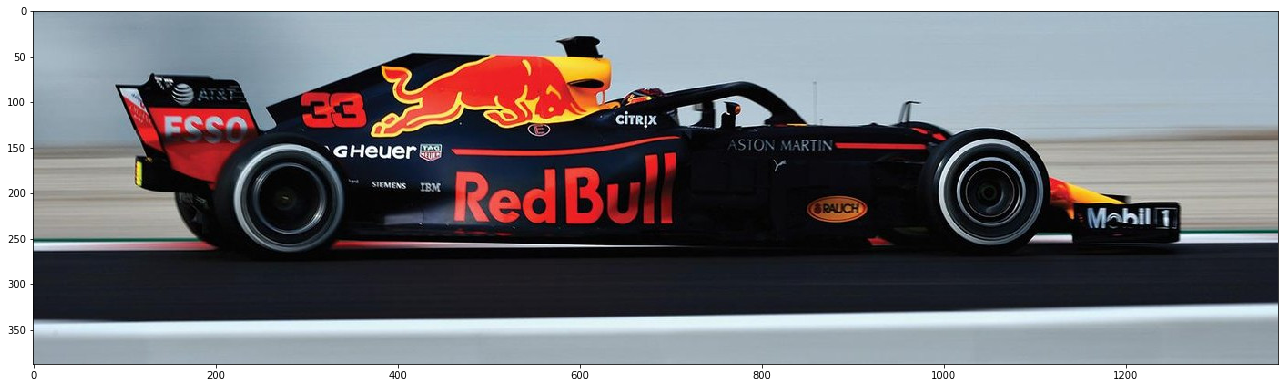

In [21]:
io.imshow(f1_rgb)

In [22]:
f1_rgb.shape

(388, 1368, 3)

In [15]:
f1_gray.shape

(388, 1368)

In [16]:
f1_rgb[100, 450]

array([231,  68,  49], dtype=uint8)

In [17]:
f1_gray[100, 450] * 255

101.2676

#### Espacios de color

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76aa63c240>,
 <matplotlib.colorbar.Colorbar at 0x7f76ac451e10>)

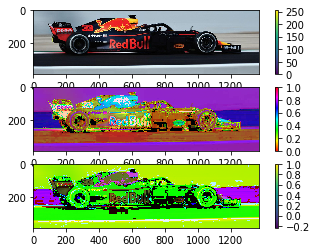

In [18]:
f1_hsv = color.rgb2hsv(f1_rgb)
f1_yiq = color.rgb2yiq(f1_rgb)

plt.subplot(311), plt.imshow(f1_rgb), plt.colorbar()
plt.subplot(312), plt.imshow(f1_hsv, cmap=plt.cm.hsv), plt.colorbar()
plt.subplot(313), plt.imshow(f1_yiq), plt.colorbar()

#### Tabla comparativa de espacios de color

In [19]:
import prettytable as pt

imgs = [f1_gray, f1_rgb, f1_hsv, f1_yiq ]
table = pt.PrettyTable()
table.field_names = ["Shape", "First Element", "Min val", "Max val"]
for img in imgs:
    table.add_row([img.shape, img[0,0], img.min(), img.max()])

print(table)

+----------------+------------------------------------------------------+-----------------+---------+
|     Shape      |                    First Element                     |     Min val     | Max val |
+----------------+------------------------------------------------------+-----------------+---------+
|  (388, 1368)   |                    0.596236078431                    |       0.0       |   1.0   |
| (388, 1368, 3) |                    [137 155 167]                     |        0        |   255   |
| (388, 1368, 3) |        [ 0.56666667  0.17964072  0.65490196]         |       0.0       |   1.0   |
| (388, 1368, 3) | [  5.92101961e-01  -5.71856379e-02  -2.87317373e-04] | -0.234602275412 |   1.0   |
+----------------+------------------------------------------------------+-----------------+---------+


Para jugar un poco más con colorspaces: http://colorizer.org/

### Aritmética de pixels

#### Cuasi Suma y Cuasi Resta *Clampeada* - Clamp == Restringir

Sumamos los valores pixel a pixel de una imagen A con una imagen B (**Ambas en el mismo espacio de color**) y clampeamos el resultado para que los valores esten entre dentro de los rangos aceptados por el colorspace que estemos manejando. En el caso de RGB el rango esta entre 0 y 255

In [23]:
img_a = io.imread('images/cat1.jpeg')
img_b = io.imread('images/cat2.jpg')
img_c = io.imread('images/coins1.jpeg')
img_d = io.imread('images/coins2.jpeg')

def adjust_size(img_a, img_b):
    """Given two images, adjust the size of both to the maximum width
     and maximum height, filling empty spaces with zeros"""
    width = max(img_a.shape[0], img_b.shape[0])
    height = max(img_a.shape[1], img_b.shape[1])
    a = np.zeros(( width, height, 3))
    b = np.zeros(( width, height, 3))
    a[:img_a.shape[0], :img_a.shape[1]] += img_a
    b[:img_b.shape[0], :img_b.shape[1]] += img_b
    
    return a, b

img1, img2 = adjust_size(img_a, img_b)

suma =  img1 + img2
suma /= suma.max()
suma[suma[:, :, 0] > 255] = 255
suma[suma[:, :, 1] > 255] = 255
suma[suma[:, :, 2] > 255] = 255

img3, img4 = adjust_size(img_c, img_d)

resta =  img3 - img4
resta /= resta.min()
resta[resta[:, :, 0] < 0] = 0
resta[resta[:, :, 1] < 0] = 0
resta[resta[:, :, 2] < 0] = 0

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76aa3ae400>,
 <matplotlib.image.AxesImage at 0x7f76aa348d68>)

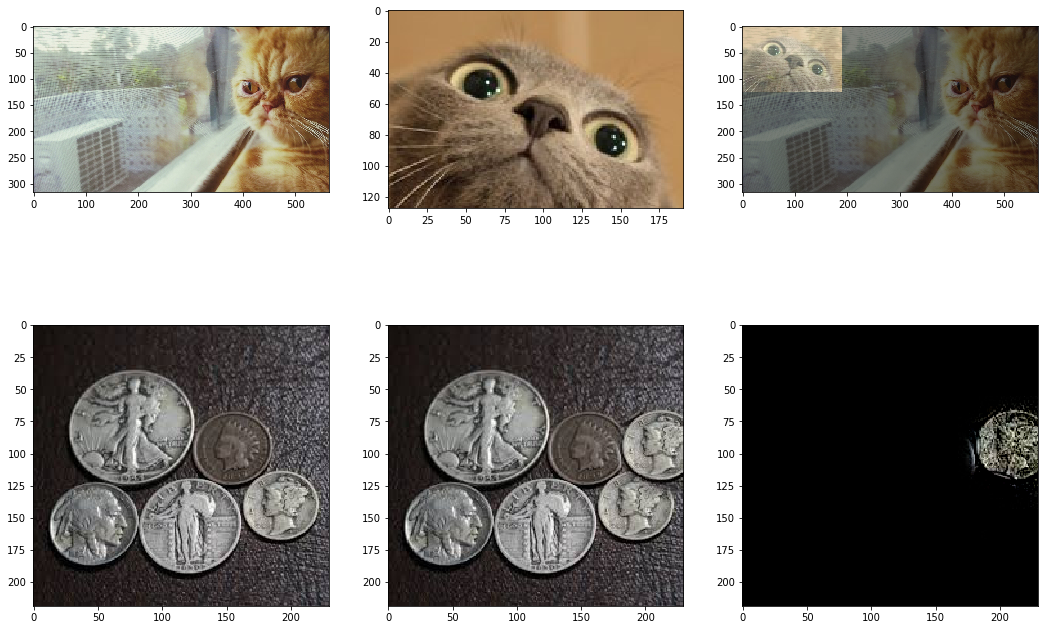

In [21]:
plt.rcParams["figure.figsize"] = [18, 12]
plt.subplot(231), plt.imshow(img_a)
plt.subplot(232), plt.imshow(img_b)
plt.subplot(233), plt.imshow(suma)
plt.subplot(234), plt.imshow(img_c)
plt.subplot(235), plt.imshow(img_d)
plt.subplot(236), plt.imshow(resta)

[Demo]: App de aritmética de pixels para ver otras operaciones.

Como vemos, las operaciones de cuasi-suma permiten realizar superposiciones de imágenes (overlay, máscaras), mientras que las cuasi-restas nos permiten detectar cambios o movimientos en una imagen. (por ejemplo: si esta fue editada)

#### Operaciones morfológicas: ver https://goo.gl/PzByuY

#### Ecualización de histogramas

In [24]:
img = color.rgb2grey(img3) / 255

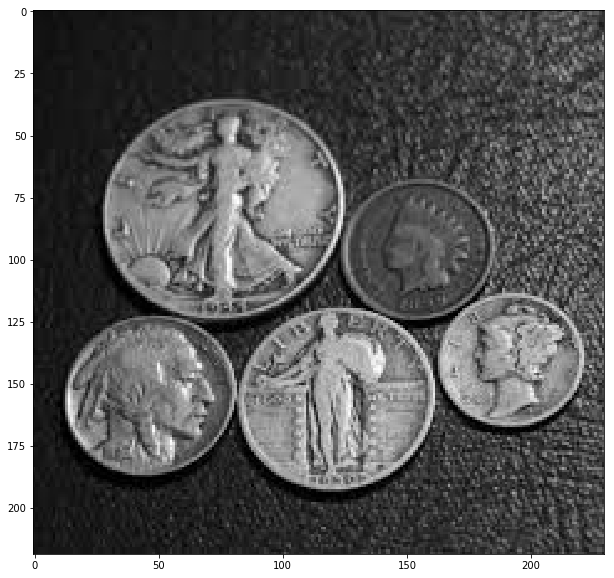

In [25]:
plt.imshow(img, cmap=plt.cm.gray)

/usr/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


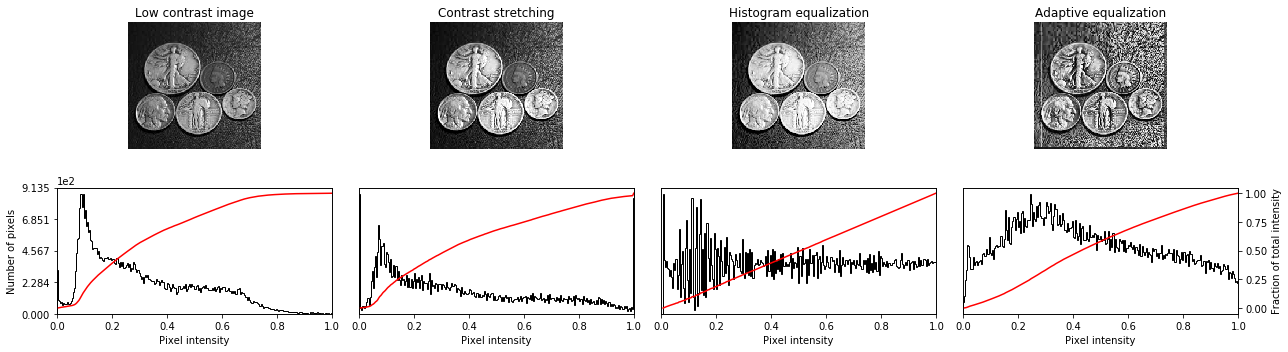

In [26]:
# Source: http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(18, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()

### Más filtros

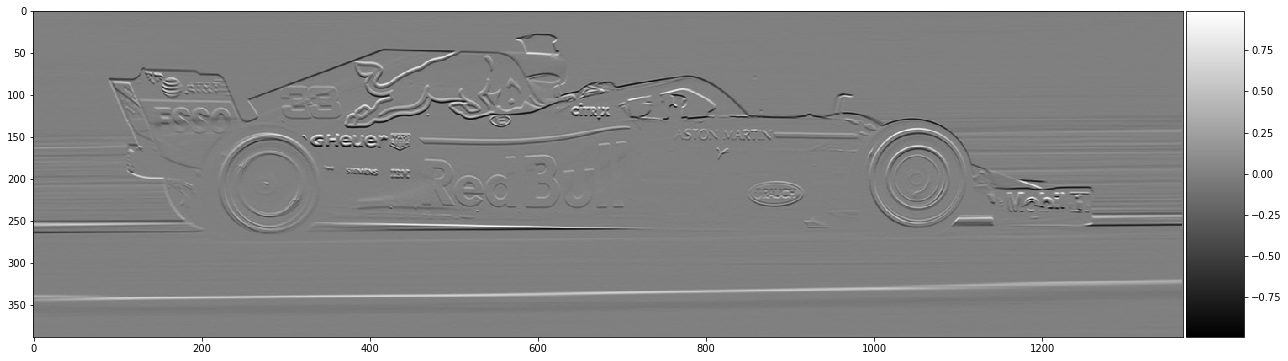

In [27]:
io.imshow(filters.sobel_h(f1_gray), cmap=plt.cm.gray)

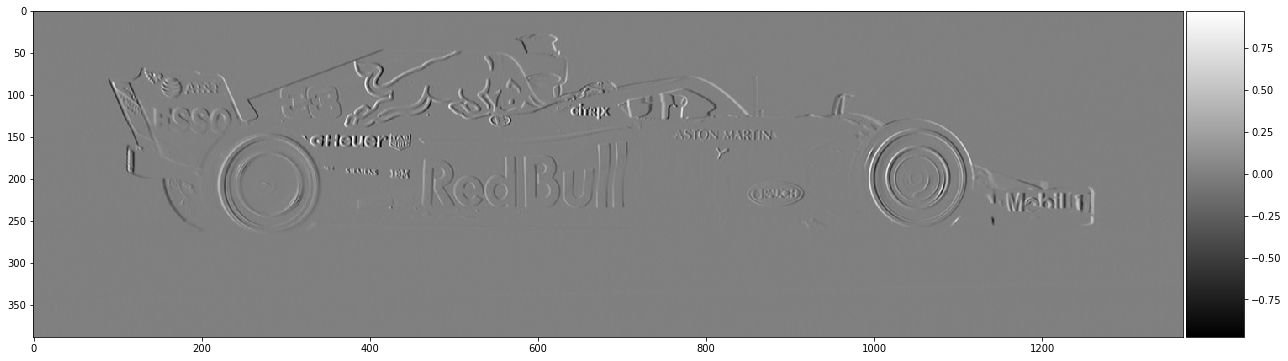

In [26]:
io.imshow(filters.sobel_v(f1_gray), cmap=plt.cm.gray)

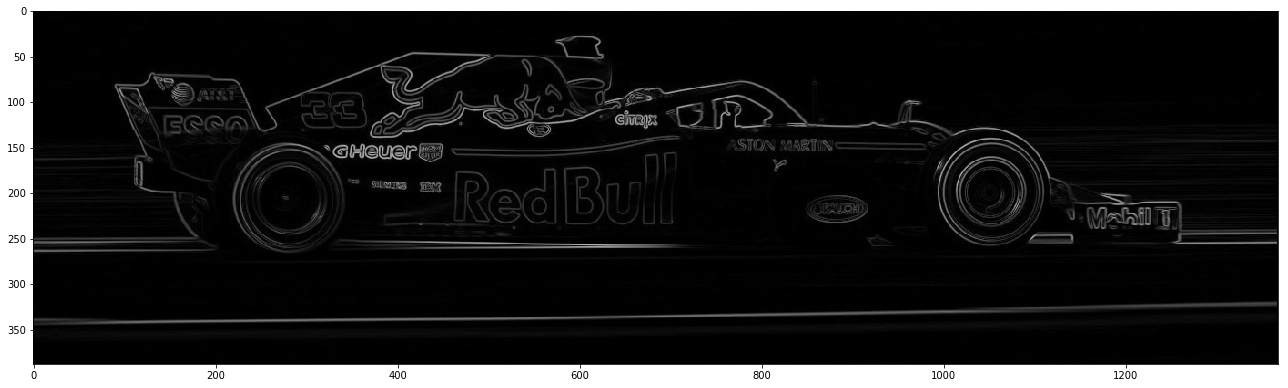

In [27]:
io.imshow(filters.sobel(f1_gray))

/usr/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


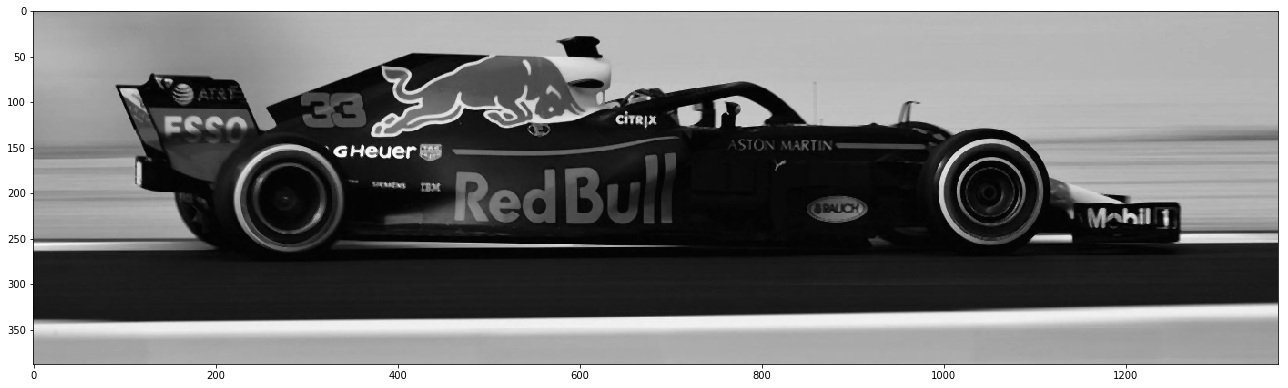

In [28]:
io.imshow(filters.median(f1_gray, np.ones((3,3))))

/usr/lib/python3.6/site-packages/skimage/filters/thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/usr/lib/python3.6/site-packages/skimage/filters/thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


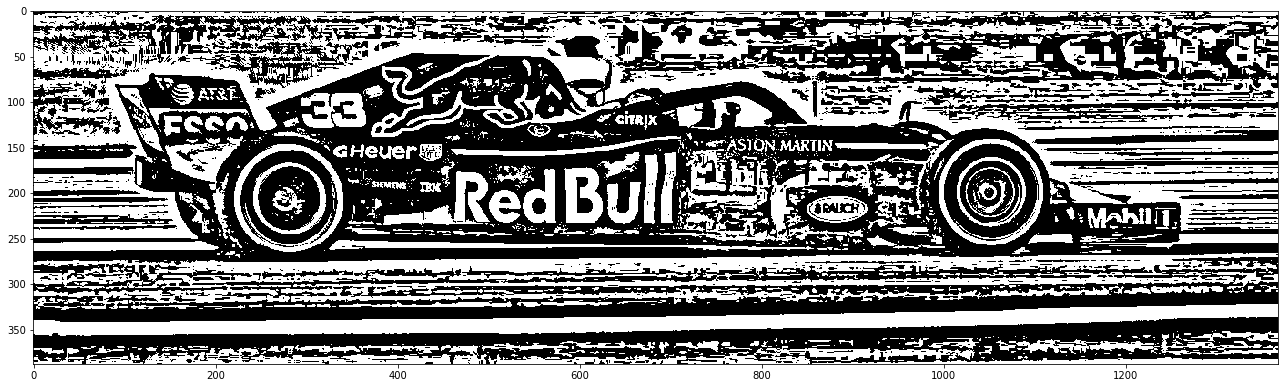

In [29]:
io.imshow(filters.threshold_adaptive(f1_gray, 31))

/usr/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


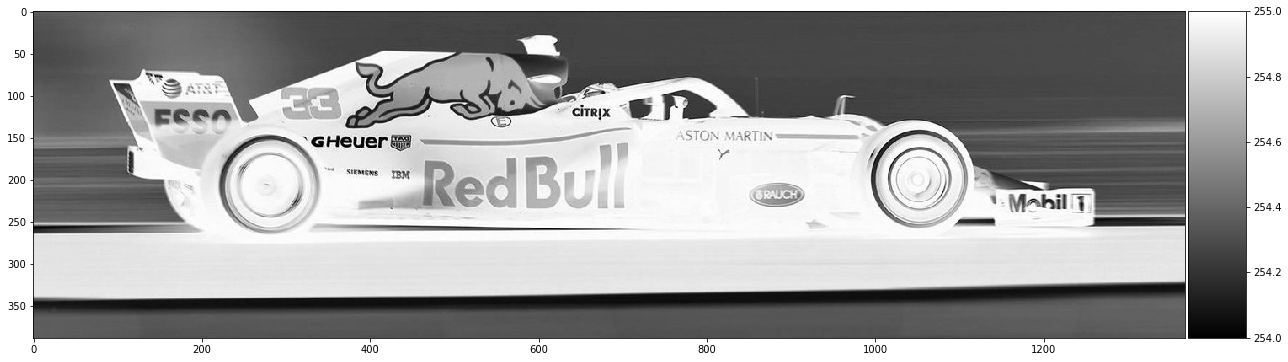

In [30]:
io.imshow(255 - f1_gray, cmap=plt.cm.gray)

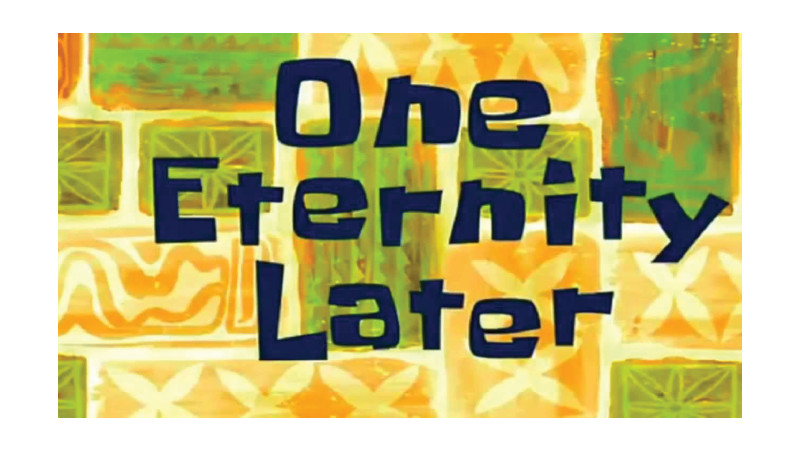

In [31]:
Image("https://res.cloudinary.com/mommy-nearest/image/upload/c_fill,h_450,w_800/q2wxg2fjorxh6h5mwhmb.jpg")